In [198]:
%matplotlib inline
import matplotlib.pyplot as plt
from manipulate_image import numpy_to_pic, pic_to_numpy
from image_process import contrast_streching, histogram_equalization, adaptive_equalization
from skimage import img_as_float, exposure
from skimage import color, io, filters
from Histogram import pic_histo
from PIL import Image
import numpy as np
import datetime


In [212]:
def convert_gray(filename):
    img = Image.open(filename).convert('L')
    updated_ending = filename.replace(filename, "gray_" + filename)
    img.save(updated_ending)
    gray_array = pic_to_numpy(updated_ending)
    return gray_array

In [167]:
gray_array = convert_gray('UCL.jpg')

In [168]:
contrast = contrast_streching(gray_array)
img_adapteq = adaptive_equalization(gray_array)
hist = histogram_equalization(gray_array)
inverted = np.invert(gray_array)

In [169]:
def export_processed_pic(pic_numpy):
    fig = plt.imshow(hist, cmap=plt.cm.gray)
    plt.savefig('processed_pic.png')

In [205]:
def increase_contrast(np_array):
    plt.imshow(gray_array, cmap= plt.cm.gray, vmin =30, vmax =200)
    plt.savefig('contrast_pic.png')

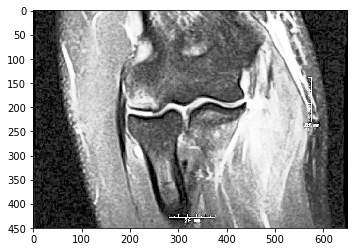

In [206]:
export_processed_pic(hist)

/home/kmc97/ImageProcessorS18/env/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


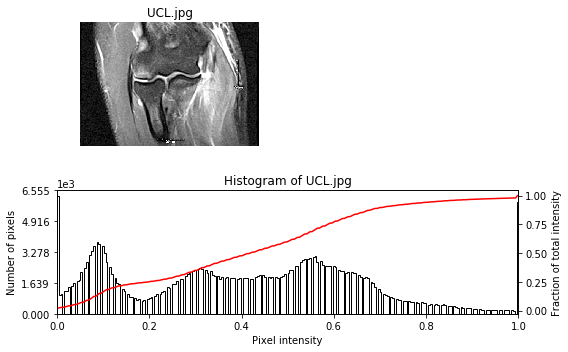

<Figure size 432x288 with 0 Axes>

In [172]:
def display_histogram(processed_pic):
    # function to turn processed pic into numpy
    fig = plt.figure(figsize=(8, 5))
    axes = np.zeros((2, 2), dtype=np.object)
    axes[0, 0] = fig.add_subplot(2, 2, 1)
    for i in range(1, 1):
        axes[0, 1] = fig.add_subplot(2, 1, 2, sharex=axes[0,0], sharey=axes[0,0])
    for i in range(0, 1):
        axes[1, i] = fig.add_subplot(2, 1, 2+i)

    ax_img, ax_hist, ax_cdf = pic_histo(contrast, axes[:, 0])
    ax_img.set_title(processed_pic)
    ax_hist.set_title('Histogram of ' + processed_pic)

    y_min, y_max = ax_hist.get_ylim()
    ax_hist.set_ylabel('Number of pixels')
    ax_hist.set_yticks(np.linspace(0, y_max, 5))

    ax_cdf.set_ylabel('Fraction of total intensity')
    ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
    fig.tight_layout()
    plt.show()
    plt.savefig('histo' + processed_pic)
display_histogram('UCL.jpg')

In [173]:
def pic_metrics(np_pic):
    num_pixels = np_pic.size
    geo_image = np_pic.shape
    min_max = [np_pic.min(), np_pic.max()]
    avg_val = np_pic.mean()
    return num_pixels, geo_image, min_max, avg_val
    
pic_metrics(contrast)

(292500, (450, 650), [0, 255], 104.45655726495727)

In [186]:
def time_now():
    timestamp = datetime.datetime.now()
    return timestamp

In [188]:
def process_time(t1):
    t2 = time_now()
    duration = t2-t1
    return duration

In [193]:
t1 = time_now()

In [194]:
print(process_time(t1))

0:00:00.657558


In [213]:
def log_compression(pic):
    pass